# Assignment 3 - Network Simulation
# Oscar Engelbrektson
# CS166, Prof. Scheffler, Spring 2020

In this assignment I extend the social dynamics model we covered in Session 7.2 on Adaptive
Networks. Specifically, I propose two changes to the model to make the dynamics more realistic. Firstly, a individual-level persuasiveness parameter is added, to capture variability in social skill between individuals in the real world. Secondly, a new mechanism for making new connections is introduced: being introduced to friends of friends. I implement this modified model in a simulation, and analyze the expected (theoretical)
and actual (experimental) effects of these changes on the model.

## 1. The modified model

The purpose of this model is to simulate the development of opinions and social connections in a social network over time. The fundamental assumptions that underlies this model are twofold and unchanged. Firstly, that people prefer forming social relationships with others who share their preferences, opinions or interests. Secondly, people’s preferences, opinions or interests tend to become similar to those of other people in their social circle.

In this framework, every node represents a person and every edge represents a social connection between two people. Each person (node) $i$ has two attributes, an opinion $o_i\in(0, 1)$ and persuasiveness $p_i\in(0, 1)$. Stubborness dictates how easily the opinion of a person is swayed towards the opinion of someone they interact with, with higher values meaning that opinions are harder to change; persuasiveness dictates how strongly a person is able to sway the opinion of another person during an interaction, with higher values meaning that opinions of the counterparty are shifted more strongly towards ones own views. Every social connection (edge) between two nodes $i, j$ is characterised by a weight $w_{ij}\in(0,1)$ and signifies the strength of the relationship. A weight close to 1 means that two people have a very
strong relationship and will tend to adjust their opinions to be closer to each other.

Further, we assume that
* there is only one topic on which people have an opinion. This is an unrealistic simplification, but hopefully it will allow us some insight into the development of opinion in social networks in general.
* time is discrete. It moves in steps that are countable with one interaction taking place at each timestep. As opposed to being continous as things work in the real world. Whilst this does break the "time" consistency between steps: once action per timestep, even though some actions might be assumed to take longer than other in the real world. For example, randomly meeting someone new as opposed to conversing with an old friend.
* all interactions occur between two individuals. There are no group interactions between multiple agents at once. This is clearly a simplification of reality as there are most definitely social events in groups.
* At the start of the simulation, all nodes are, with equal probability, assigned eiher 1 or 0  as their opinion. At the population level, the opinion distribution is bimodal with peaks at the upper and lower extremes.
* Updates are asynchronous. This means that there is only an interaction between two people at any given timestep. In reality, of course, people in different parts of the world can be speaking at the same time. However, whilst this does require more steps to be taken to achieve a given number of actions, it does not alter the much the behavior of the network over time. For example, A interaction with B and C interacting with D will have the same effect on the weights and opinions of the nodes regardless of if the two interactions occured simultaneously or sequentially.
* stubbornness $\alpha$ is the same for every person in the entire population. 

At every timestep in the model, one of two things happens. With probability 0.01, a new connection is formed between two previously unconnected nodes. Conceptually, this is equivalent to a friendship being formed with a stranger after meeting by chance, e.g. at an airport. It is assumed that the strenght of such a new relationship is $w_{ij}=0.5$. Else (with implicit probability $1-0.01=0.99$), two people with a pre-existing social connection interact. The pair is chosen at random and they update both their opinions and the strenght of the social relationship. The mathematical details are covered in the next subsection, but the principle is that the opinion of one node is swayed more closely to that of the other node, respectively. How far it is swayed depends on the strength of the relationship, how stubborn one is and how persuasive the other person is. The strength of the relationship is updated such that people with more similar opinions become closer friends and if the opinions are sufficiently dissimilar, the relationship weakens.

Furthermore, whenever two nodes interact there is a 10% chance that a node $i$ will introduce the other node $j$ to one node $i$'s friends, node $m$. The strength of a new relationship depends on the strength of the relationship two nodes have with the introducer. If both $i$ and $m$ are close friends with node $j$, then the initial strength of the connection between $i$ and $m$ will be stronger, and vice versa. This procedure is symmetric, thus with 10% probability $j$ will introduce the other node $i$ to one node $j$'s friends. It is thus possible that two new connections be formed in one round (with probability $0.1*0.1=0.01$).


### 1.2 Update Rules
#### Relationship weights and opinions
Every time two nodes $i$ and $ij$ interact, their respective opinions and the strenght of their connection is update by the following rules:
1. Change in opinion: $\Delta o_i =  \alpha(1+p_j)w_{ij}(o_j-o_i)$

2. Change in connection weight: $\beta w_{ij} (1-w_{ij})(1-\gamma |o_i - o_j|)$

$\alpha$: Stubborness. Together with the weight, this controls how far the opinion of node $i$ is shifted towards the opinion of node $j$ in one interaction. Conceptually, we can think of the pursuasiveness of node $j$ decreasing the stubborness of node $i$. This parameter to the same for each node and we assume the value is 0.03.

$\beta$: $\beta$ is to connection weights what $\alpha$ is to opinion–it scales how much change takes place in a single interaction. Higher values result in larger changes, ceteris paribus. This parameter is assumed to the same for each node and we assume the value is 0.3.

$\gamma$: More than just affecing the magnitude of change in the connection weight, $\gamma$ is unique in that it can affect the direction of change. Since the difference in opinions between two nodes can never be greater than one, values $\gamma$ smaller than or equal to one will always result in positive direction of change. However, if $\gamma$ is greater than 1, the connection weight between two nodes can decrease if the difference between their opinions is sufficiently large, such that $1<\gamma |o_i - o_j|$. This parameter is assumed to the same for each node and we assume the value is 4.

#### Forming new connections
New connection weight for nodes $i, m$ introduced by node $j$: $ w_{im} = 0.25(w_{ij} + w_{jm})$

The thought process behind this update equation is that the trust/connection we have for new friends we meet in this fashion, is dependent on the trust/connection we have for the friend who introduced us. Of course, there is only one weight per two node connection. Consequently, the above formula was derived on the assumption that we take the average of the connections between the two new friends to the introducing node, and then divide that by two to account for the fact that they have no prior history of interaction to build the friendship and it should thus be lower the preexisting one. The above formula is just a simplified form of this expression:

$((w_{ij} + w_{jm})/2)/2 = 0.25(w_{ij} + w_{jm})$

#### Breaking connection
If a connection weight falls below 0.05, we assume that the connection is so weak that it disappears. In terms of implementation, we remove the edge that previously joined the two nodes, effectively rendering them strangers without impact on eachothers opinions.

### 1.4 Justification of changes
The changes proposed to the original model are two. Firstly the addition of varying persuasiveness of nodes and secondly the novel process by which connections may be formed. I think both modifications make the model more realistic. 

In the real world, all people are not the same in terms of how willing and able they are to sway people towards their view on controversial topics. Some are convert non-believers on the regular whilst others have no noticable impact on the views of those they interact with, most are probably somewhere in between the two extremes. The addition of an individual-specific persuasiveness term goes some way to capturing this, enriching the way opinions change through interaction in the model. Granted, the same argument is equally applicable to stubbornness. However, I came to the conclusion that adding individual variability across all parameters, whilst likely more realistic, obfuscated analytical insights more than it enriched the dynamics of the network. Some variability is desirable to investigate whether it has a notable impact on the behavior of the system as a whole–but not too much.

The original model made the assumption that it is equally likely that a connection to a new individual is equally likely regardless of the shortest path lenght between the individuals. It is most definitely true that connections are sometimes formed through random encounters, e.g. on a long-haul flight, but it is by no means the most common form of social networking–less still the only form! I think that it is much more common that we become friends and form connections through our existing social network (distance=2)than by meeting people we are separated from by many degrees (long shortest path / distance). Specifically, it is common that our friends introduce us to their friends. It is my belief that the trust/connection we have for new friends we meet in that fashion, is dependent on the trust/connection we have for the friend who introduced us. Adding this process of friends of friends socialization, is thus a significant step towards modelling more realistically the process by which social network structure develops. In my model, this is approximately 10 times more likely than befriending a completely random person in the network.


## 2. Local Analysis
To build an understanding for how agents behave and interact under these rules, we begin by analyzing behavior in the very simplest case–the relationship between two people, represented by a network of two nodes and one edge. To understand how a relationship will develop over time, the direction–or sign–of change in weight and opinions is of special interest. For example, if we can show that the sign will always be positive, then we know that the parameter will tend towards the maximum value in the long-term. For each of the two update equations, we investigate the local dynamics.

#### Change in opinion
$\Delta o_i =  \alpha(1+p_j)w_{ij}(o_j-o_i)$

Firstly, to investigate the direction of change, notice that $\alpha, (1+p_j), w_{ij}$ must all be positive (or zero) by definition. The point being, they can never change the sign of the change. This leaves only the term $(o_j-o_i)$. If $o_j>o_i$, then $(o_j-o_i)$ is negative. This means that $o_i$ will be smaller after the update, and thereby also more similar to $o_j$. Else, if $o_j<o_i$, then $(o_j-o_i)$ is positive. This means that $o_i$ will be larger after the update, and thereby also more similar to $o_j$. Notice that in both cases, the difference in opinions decreases after the update. Further, notice that the sign of the update function is symmetric with regard to the units. That is, the opinion that is higher will always decrease and the opinion that is lower will always increase. However, the magnitude of the change is not symmetric, as it affected by the persuasiveness of the other node. Lastly, in the case that $o_j=o_i$, then then $(o_j-o_i)=0$ and the product that is the change in opinion equation goes to zero, meaning that the opinions do not change at all.

If we apply this update rule to both nodes $i$ and $j$, we get that the change in the difference in opinion is given by:

$-(\Delta o_i + \Delta o_j) = -(\alpha(1+p_j)w_{ij}(o_j-o_i) + \alpha(1+p_i)w_{ij}(o_j-o_i)) $

which simplifies to, 

$-\alpha (o_j-o_i) (2 + p_i + p_j)w_{ij} $

Of particular interest here is that the magnitude of the decrease in difference of opinion scales with the sum of the persuasiveness scores of the nodes. For example, this means that, ceteris paribus, p_i = 1,  p_j = 2 will result in the same change as p_i = 3 and p_j = 0. In other words, individual persuasiveness scores of the interacting nodes do not matter in explaining the change in the difference of opinion. Only the sum of the persuasiveness scores matters.

#### Change in connection weight 
$\beta w_{ij} (1-w_{ij})(1-\gamma |o_i - o_j|)$

Similar to the previous update equation, $\beta, w_{ij}, 1-w_{ij}$ must all be positive (or zero) by definition. The point being, they can never change the sign of the change. This leaves only the term $(1-\gamma |o_i - o_j|)$. For the direction of change to be negative, i.e. for the weight of a connection to decrease following an interaction, it must be true that $1<\gamma |o_i - o_j|$. As opinions are constrained to be in the range (0, 1), $|o_i - o_j|$ must be equal to or greater than zero. This means that if $\gamma \leq 1$, the direction of change will always be positive, meaning that every interaction strengthens the connection between the nodes. For $\gamma$ values greater than 1, there is a critical opinion differences threshold beyond which the direction of change becomes negative. Specifically, $1<\gamma |o_i - o_j|$ iff $\frac{1}{\gamma} < |o_i - o_j|$. For $\gamma = 4$, as in our model, this places the critical threshold for opinion difference at $\frac{1}{4}=0.25$.

If we combine our analyses of the changes in opinions and relationship weights, what conclusions might we draw about the long-term behavior of the two person system. We know that relationship weight will decrease for all opinion differences above 0.25 and that the difference in opinions will always decrease. Consequently, we might divide our predictions into two distinct cases. Firstly, the case in which the initial opinion difference is smaller than the critical threshold of 0.25. In this case, the strenght of the connection will increase and the opinion differences will decrease until they both reach the extreme values of 1 and 0, respectively. In the second case, the initial opinion difference is greater than the critical threshold of 0.25. In this case, we have two competing forces. At every step, the opinion difference will decrease and the connection weight will decrease until one of two things happens: either the opinion difference reaches the critical threshold of 0.25 and we are effectively transferred to the first case; or the connection weight reaches the critical threshold of 0.05, at which point the edge is removed and the two people cut contact. Which happens first depends on the relative speed at which the opinions and connection weights change, which in turn depends all the parameter and variable values in the update functions. To investigate this further, we use vector field plots which, for a given set of parameter values, show the opinion difference change and connection weight change for each possible opinion and connection weight.

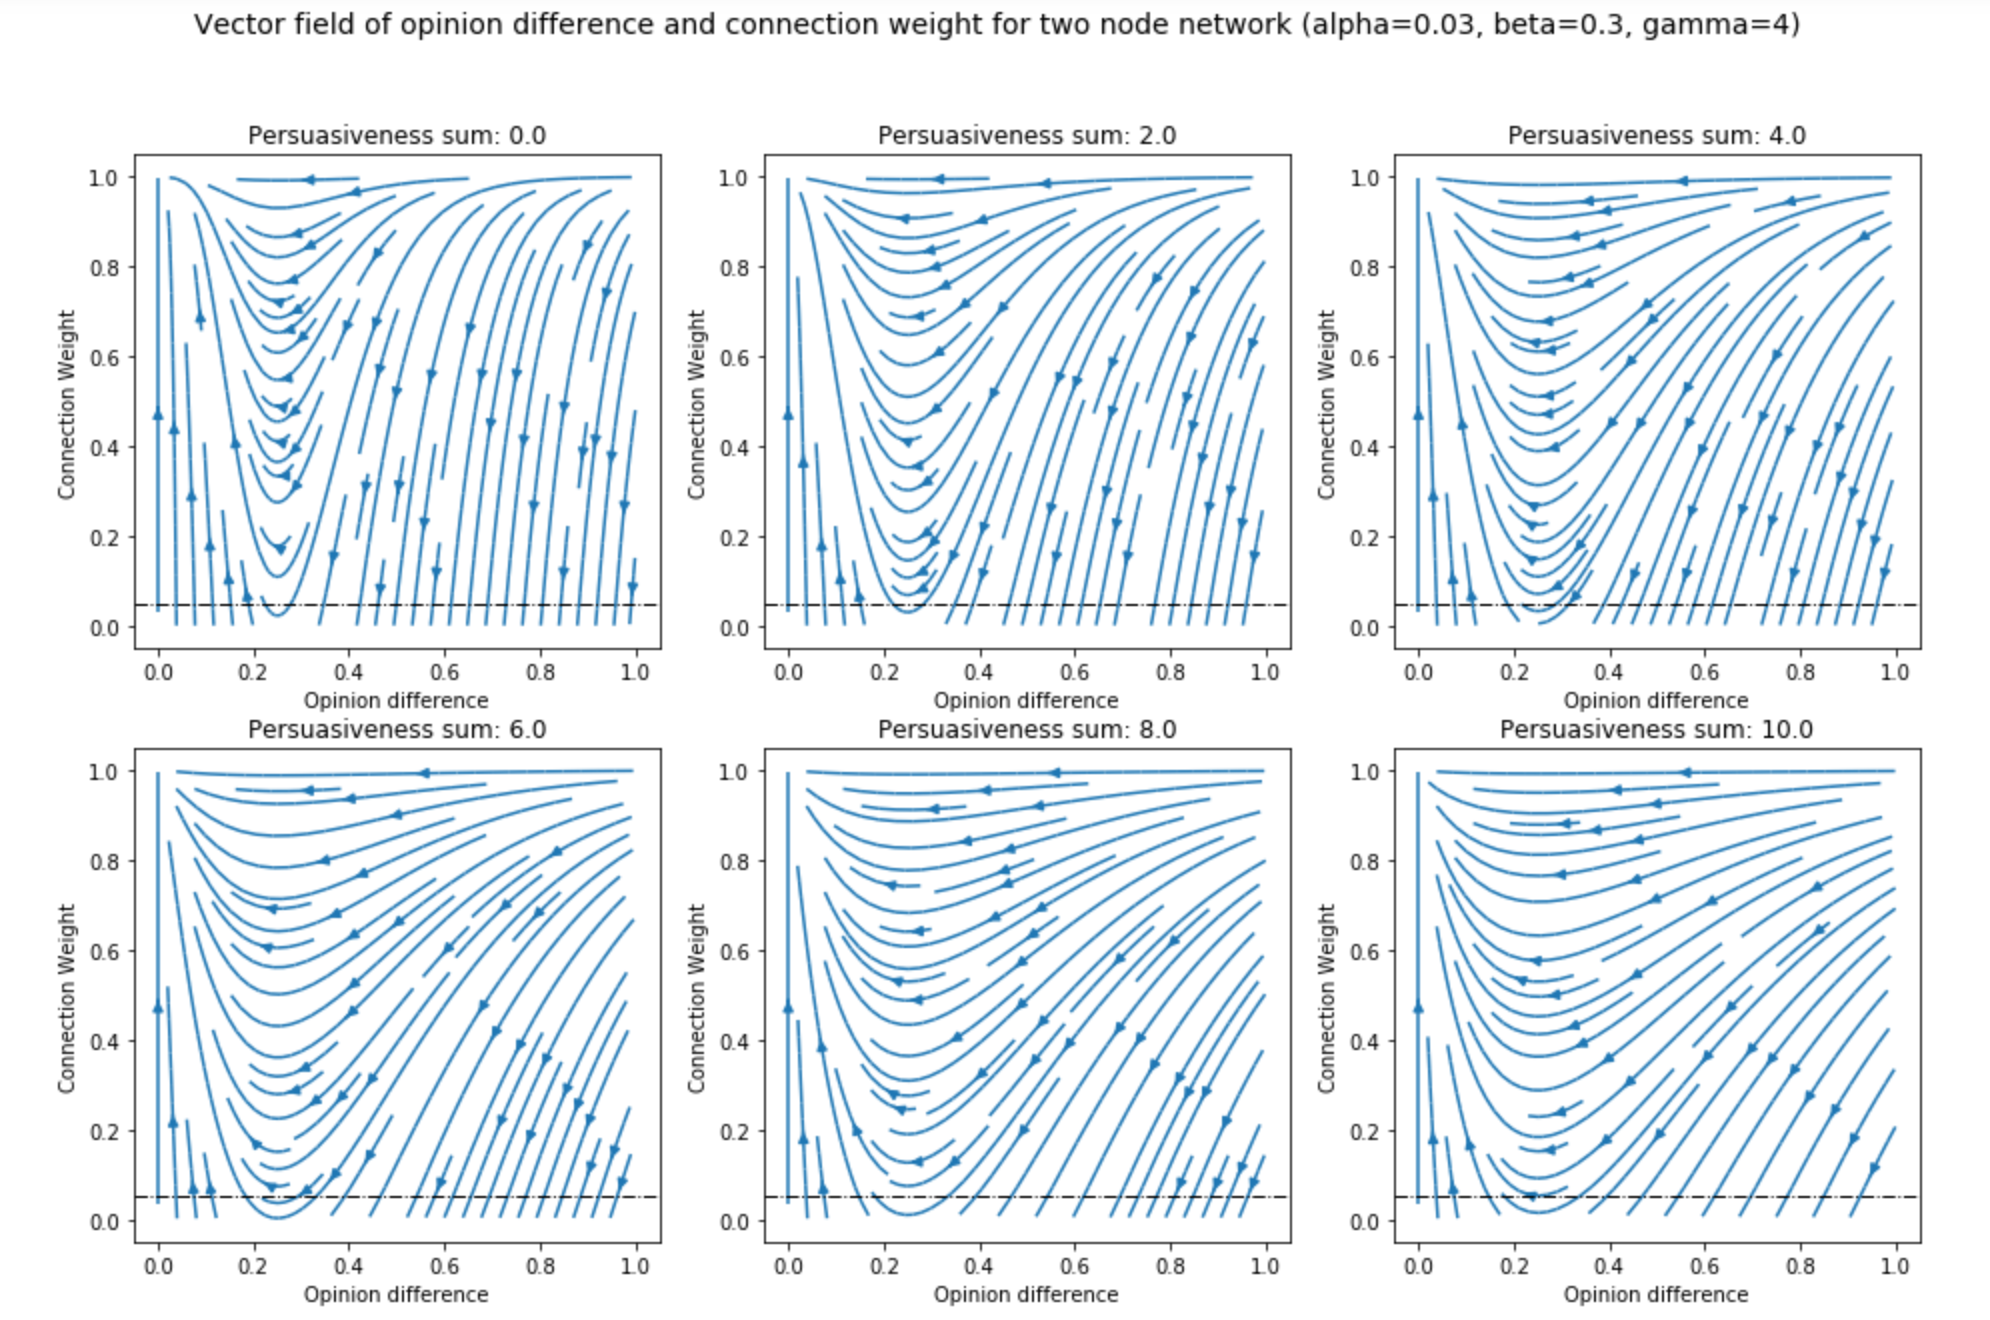
Fig 1. Six vector field plots tracing the possible paths of the opinion difference and connection weight for a two node network. Each vector field was genereated using the update rules defined in section 1.2 and parameters $\alpha=0.03, \beta=0.3, \gamma=4$. Each of the six plots was generated with a different persuasiveness sum, $p_j+p_i$, from [0, 2, 4, 6, 8, 10] as indicated in the title of each subplot. The dashed, black horizontal line at connection weight = 0.05, represents the point below which connections/friendships break. 

These plots allow us to study what end state the two-node network converges to for any initial state. Firstly, in each of the plots, we can clearly see the critical point at opinion difference = 0.25, it is the point at which the sign of the change in the y-direction flips. If the opinion difference is lower than 0.25, the network state converges to 0 difference and connection weight = 1 for any initial connection weight. Comparing the plots, we see that the change in the negative x-direction is greater for higher persuasiveness sums. This in turn has the effect that the critical point of 0.25 opinion difference can be reached from a larger set of inital states. This is easiest to notice when comparing the plots with the lowest and highest persuasiveness sums, respectively–all intermediate persuasiveness sums exhibit commensurately intermediate behavior. When the persuasiveness sum is 0, the change in the x-direction is very slow and the critical opinion difference threshold can only be reached from initial opinion differences quite close to it (about 0.5), even if the intial connection weight is 1. This means that the connection will end up breaking for most initial states where opinion difference is greater than 0.25. When the persuasiveness sum is 10, the highest value, the change in the x-direction is faster and the critical opinion difference can be reached from inital states that are farther away than what is possible for lower persuasiveness sums. In fact, even if the initial opinion difference is 1, the critical threshold can be reached if the intial connection strenght was 0.65 or greater. This means that the system will converge to 0 opinion difference and connection weight = 1 for a majority of the possible intial states. 

One could begin to look into what specific values lead to what convergence and create expressions in terms of the persuasiveness sum and so on. However, applying these update rules to the interactions of multiple agents give rise to complex behavior that is not captured in the 2-node network. We can thus not be sure that detailed, nuanced predictions about the convergence / behavior of the system derived at the local level will generalize well to the global behavior of these rules applied to a large network. In light of this, let's run the simulation on a large network!

## 3. Simulation

### Choice of random graph
For this simulation, I have choosed to initalize the network using a Watts-Strogatz random graph. It is created using by arranging n nodes in a circle. Each node is connected to its k-nearest neighbours. Connections are then randomly rewired to new nodes in the network with probability p. The watts-strogatz graph used to intialize this simulation has n=50, k=5, p=0.5. This results in a random graph with 50 nodes, 100 edges and average degree 4.
This is an appropriate choice of graph because it is random, providing variability for our simulations, and it is reminiscent of what we expect social networks to look like–as opposed to certain other random graphs. This provides a satisfactory starting point for our simulation. So long as the initial configuration is not very extreme in some sense, we expect the long-term convergence of the simulation to be unimpeded, it will just take a larger number of iterations to reach it. In that sense, I think this graph poses a good compromise: it provides a reasonable starting point allowing for faster convergence of the models, without being strongly biased towards a certain end state.

### Variable initalization
* All edges/connection weights are initialized to be 0.5.
* The opinion of each node is randomly chosen with equal probability to be 0 or 1. That is, the distribution of opinions on the population levelstarts out perfectly bimodal with peaks at the extremes.
* The persuasiveness of each node is sampled from a truncated normal distribution with mean 3 and standard deviation 1, $N(p_i; 3,1)$. Upper and lower bounds are 0 and 10, respectively.

The resulting intial state of the network looks something like this, with the colour of the nodes representing the opinions they hold:
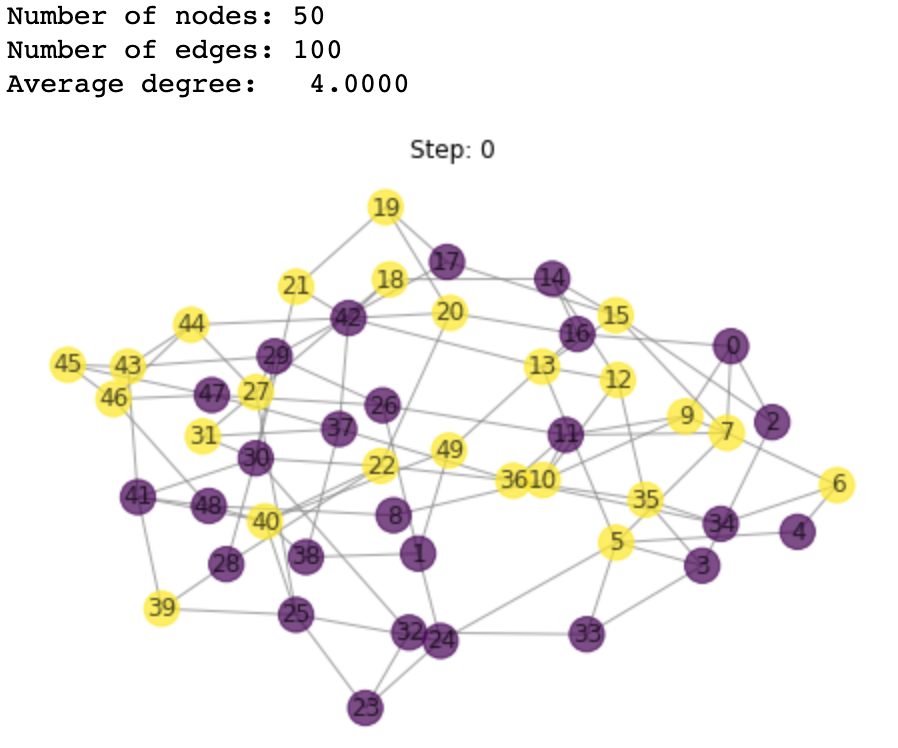


### Results

###  Realism and future work
One key observation is that the average degree grows to be really large in relation to what one might consider realistic. The average
One might consider adding some constraints to the number of connections or the sum of all connection weights for each node. This would represent the social capacity of individuals, which in this model is infinity but in the real world clearly is not.

## Appendix: Implementation

### Vector fields

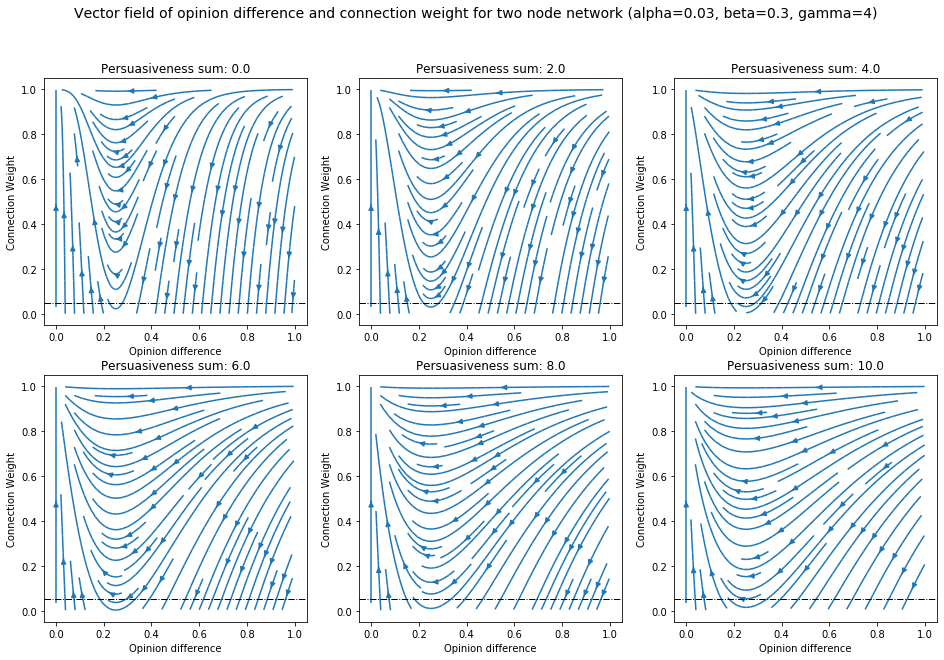

In [287]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

def get_change_vector(o, w, p, alpha=0.03, beta=0.3,gamma=4):
    '''
    Takes the difference in opinion (o) between two nodes, their connection weight (w),
    the sum of their persuasiveness scores (p),
    and alpha, beta and gamma values as described in section 1.4.
    returns the change in difference of opinions and in weight of relationship according
    to the update rules from section 1.2
    '''
    
    #difference in difference in opinion
    o_change = -alpha*o*w*(2+p)
    #difference in connection weight
    w_change = beta*w*(1-w)*(1-gamma*abs(o))
    
    return o_change,w_change

#Setting up parameters
x = np.linspace(0,1,10) #list of different opinion differences
y = np.linspace(0,1,10) #list of different connection weights
X,Y = np.meshgrid(x,y)  #meshgrid for vector field plot
n = 6 #number of persuasiveness sums
p_values = np.linspace(0,10,n) 

#parameter values
alpha= 0.03
beta = 0.3
gamma = 4


colour_map = cm.get_cmap('coolwarm',n)
plt.figure(figsize=(16,10))
plt.suptitle("Vector field of opinion difference and connection weight for two node network (alpha=0.03, beta=0.3, gamma=4)",
            fontsize=14)

#Make a subplot vector field for each p_value
for p in p_values:
    plt.subplot(2, 3, (p/2)+1)
    U,V = get_change_vector(X,Y,p,alpha,beta,gamma)
    #plt.streamplot(X,Y,U,V,color = colour_map(colour/n))
    plt.streamplot(X,Y,U,V)
    plt.title("Persuasiveness sum: {}".format(p))
    plt.xlabel('Opinion difference')
    plt.ylabel('Connection Weight')
    plt.ylim([-0.05,1.05])
    plt.xlim([-0.05,1.05])
    plt.axhline(0.05, color='black', linewidth=1, linestyle='-.')
    
plt.show()

# Simulation

In [194]:
from matplotlib import pyplot as plt
import networkx as nx
import scipy.stats as sts
import numpy as np
import scipy.stats as sts
import random

In [303]:
class SocialDynamicsSimulation:
    '''
    Simulate social dynamics by strengthening opinions and connection weights
    based on random interactions between nodes.
    '''

    def __init__(self, network_size=50, alpha = 0.03, beta=0.3, gamma=4):
        '''
        Inputs:

            network_size (int) The number of nodes in the random Watts-Strogatz
              small-world network. Default: 50.

            alpha (float) The rate at which nodes adjust their opinions to
              match neighboring nodes' opinions during interactions.
              Default: 0.03.

            beta (float) The rate at which edge weights are changed in
              response to differing opinions. Default: 0.3.

            gamma (float) The pickiness of nodes. Nodes with opinions differing
              by more than 1/gamma will result in an edge weight decreasing.
              Default: 4.
        '''
        self.network_size = network_size
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.step = 0
    
    def trunc_norm_sampler(self, mu, sigma, lower=0, upper=1):
        '''
        Returns one sample from a truncated normal distribution with scale=sigma and mean=mu,
        bounds for truncation are given by lower upper
        '''
        return sts.truncnorm((lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma).rvs()

    def initialize(self):
        '''
        Initialize the simulation with a random graph, with random 0 or 1
        opinions assigned to all nodes and initial edge weights of 0.5.
        '''
        self.graph = nx.watts_strogatz_graph(50, 5, 0.5)
        for edge in self.graph.edges:
            self.graph.edges[edge]['weight'] = 0.5
        for node in self.graph.nodes:
            self.graph.nodes[node]['opinion'] = random.randint(0, 1)
            self.graph.nodes[node]["persuasiveness"] = self.trunc_norm_sampler(0.5, 0.3)
        self.layout = nx.spring_layout(self.graph)  # Initial visual layout
        self.step = 0
        
    def initialize2(self):
        '''
        Initialize the simulation with a random graph, with random 0 or 1
        opinions assigned to all nodes and initial edge weights of 0.5.
        '''
        self.graph = nx.watts_strogatz_graph(50, 5, 0.5)
        for edge in self.graph.edges:
            self.graph.edges[edge]['weight'] = 0.5
        for node in self.graph.nodes:
            self.graph.nodes[node]['opinion'] = random.randint(0, 1)
            self.graph.nodes[node]["persuasiveness"] = self.trunc_norm_sampler(0.5, 0.3)
        self.layout = nx.spring_layout(self.graph)  # Initial visual layout
        self.step = 0

    def observe_state(self):
        '''
        Draw the state of the network.
        '''
        self.layout = nx.spring_layout(self.graph, pos = self.layout, iterations=5)
        plt.clf()
        nx.draw(
            self.graph, pos=self.layout, with_labels=True,
            node_color=[self.graph.nodes[i]['opinion'] for i in self.graph.nodes],
            edge_color=[self.graph.edges[i, j]['weight'] for i, j in self.graph.edges],
            edge_cmap=plt.cm.binary, edge_vmin=0, edge_vmax=1,
            alpha=0.7, vmin=0, vmax=1)
        plt.title('Step: ' + str(self.step))
        
    def avg_neighbour_degree(self):
        '''
        Returns the average degree of neighbors in the network
        '''
        deg = 0
        node = 0
        #For each edge in the graph
        for edge in self.graph.edges():
            #For each neighbour of the edge
            for neighbour in edge:
                deg += len(self.graph.edges(neighbour))
                node += 1
                
        return deg / node
    
    def total_edge_weight(self):
        '''
        Returns list of edge weights
        '''
        total = 0
        for edge in self.graph.edges():
            total += self.graph.edges[edge]["weight"] 
            
        return total
    
    def observe_opinion_dist(self):
        '''
        Returns list of the opinion of each node in the network
        '''
        return [self.graph.nodes[n]['opinion'] for n in self.graph.nodes]
        

    def update(self):
        #################################################
            ### Making new connections: Meeting strangers ###
        #################################################
        if random.uniform(0, 1) < 0.01:
            # Create a new edge with weight 0.5 between two unconnected nodes
            nodes = list(self.graph.nodes)
            while True:
                new_edge = random.sample(nodes, 2)
                if new_edge not in self.graph.edges:
                    break
            self.graph.add_edge(new_edge[0], new_edge[1], weight=0.5)
            
        else:
            #######################################################
            ### Two nodes interact: opinions and weights update ###
            #######################################################
            
            # Select a random edge and update node opinions and connection weight
            edge = random.choice(list(self.graph.edges))
            weight = self.graph.edges[edge]['weight']
            opinions = [self.graph.nodes[n]['opinion'] for n in edge]
            persuasiveness = [self.graph.nodes[n]['persuasiveness'] for n in edge]
            for i in [0, 1]:
                self.graph.nodes[edge[i]]['opinion'] = (
                    opinions[i] + self.alpha*(1+persuasiveness[1-i]) * weight * (opinions[1-i] - opinions[i]))
            self.graph.edges[edge]['weight'] = (
                weight +
                self.beta * weight * (1-weight) *
                (1 - self.gamma * abs(opinions[0] - opinions[1])))
            # Remove very weak connections
            if self.graph.edges[edge]['weight'] < 0.05:
                self.graph.remove_edge(*edge)
            
            ##########################################################
            ### Making new connections: Meeting friends of friends ###
            ##########################################################
            
            #If the relationship is not so weak that it breaks,
            #With some probability introduce each other to new friends
            else:
                for i in [0,1]:
                    if random.uniform(0, 1) < 0.1:
                        #A meets one of Bs friends
                        a = edge[i]
                        b = edge[1-i]

                        #Neighbours that the other node does not share
                        potential_new_friends = list(set(self.graph.neighbors(b)) \
                                                     - set(self.graph.neighbors(a)))
                        potential_new_friends.remove(a) #You cannot introduce someone to themselves
                        
                        #If A already knows all of Bs friends, there is no one to introduce A to
                        try: 
                            new_friend =  random.choice(potential_new_friends) #Pick one at random
                        except IndexError: 
                            continue

                        #compute relationship weight
                        relationship_weight = 0.25*(self.graph.edges[edge]["weight"] + self.graph.edges[new_friend, b]["weight"])

                        self.graph.add_edge(edge[i], new_friend, weight=relationship_weight)
                    
        self.step += 1

Name: 
Type: Graph
Number of nodes: 50
Number of edges: 100
Average degree:   4.0000


50.0

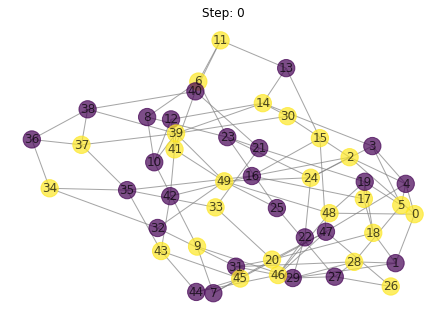

In [304]:
sim = SocialDynamicsSimulation()
sim.initialize()
print(nx.info(sim.graph))
sim.observe_state()
sim.total_edge_weight()

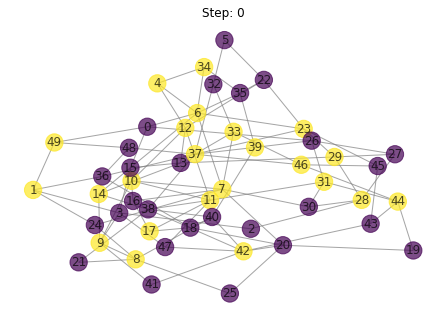

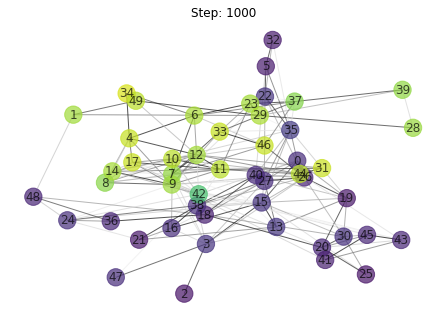

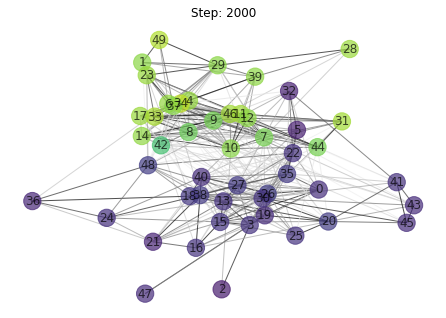

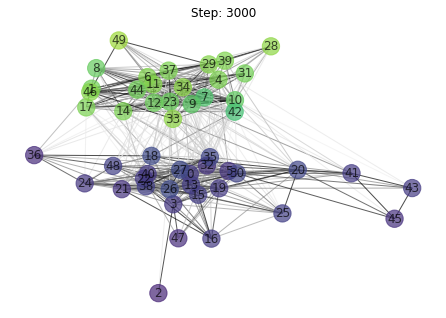

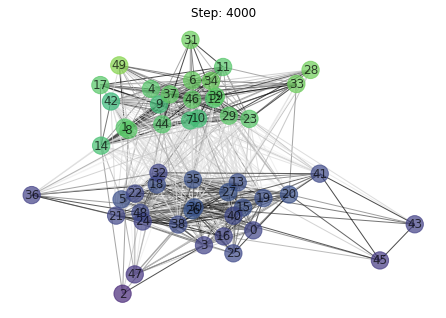

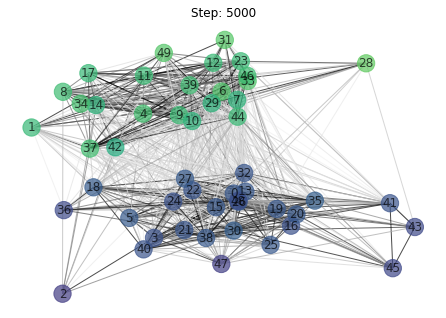

In [291]:
sim = SocialDynamicsSimulation()
sim.initialize()
plt.figure()
sim.observe_state()
for _ in range(5):
    for i in range(1000):
        sim.update()
    plt.figure()


In [112]:
#Original
class SocialDynamicsSimulation:
    '''
    Simulate social dynamics by strengthening opinions and connection weights
    based on random interactions between nodes.
    '''

    def __init__(self, network_size=50, alpha=0.03, beta=0.3, gamma=4):
        '''
        Inputs:

            network_size (int) The number of nodes in the random Watts-Strogatz
              small-world network. Default: 50.

            alpha (float) The rate at which nodes adjust their opinions to
              match neighboring nodes' opinions during interactions.
              Default: 0.03.

            beta (float) The rate at which edge weights are changed in
              response to differing opinions. Default: 0.3.

            gamma (float) The pickiness of nodes. Nodes with opinions differing
              by more than 1/gamma will result in an edge weight decreasing.
              Default: 4.
        '''
        self.network_size = network_size
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma

    def initialize(self):
        '''
        Initialize the simulation with a random graph, with random 0 or 1
        opinions assigned to all nodes and initial edge weights of 0.5.
        '''
        self.graph = nx.watts_strogatz_graph(50, 5, 0.5)
        for edge in self.graph.edges:
            self.graph.edges[edge]['weight'] = 0.5
        for node in self.graph.nodes:
            self.graph.nodes[node]['opinion'] = random.randint(0, 1)
            self.graph.nodes[node]["persuasiveness"] = np.random.uniform(0, 0.5)
        self.layout = nx.spring_layout(self.graph)  # Initial visual layout
        self.step = 0

    def observe(self):
        '''
        Draw the state of the network.
        '''
        self.layout = nx.spring_layout(self.graph, pos = self.layout, iterations=5)
        plt.clf()
        nx.draw(
            self.graph, pos=self.layout, with_labels=True,
            node_color=[self.graph.nodes[i]['opinion'] for i in self.graph.nodes],
            edge_color=[self.graph.edges[i, j]['weight'] for i, j in self.graph.edges],
            edge_cmap=plt.cm.binary, edge_vmin=0, edge_vmax=1,
            alpha=0.7, vmin=0, vmax=1)
        plt.title('Step: ' + str(self.step))

    def update(self):
        if random.uniform(0, 1) < 0.01:
            # Create a new edge with weight 0.5 between two unconnected nodes
            nodes = list(self.graph.nodes)
            while True:
                new_edge = random.sample(nodes, 2)
                if new_edge not in self.graph.edges:
                    break
            self.graph.add_edge(new_edge[0], new_edge[1], weight=0.5)
        else:
            # Select a random edge and update node opinions and edge weight
            edge = random.choice(list(self.graph.edges))
            weight = self.graph.edges[edge]['weight']
            opinions = [self.graph.nodes[n]['opinion'] for n in edge]
            for i in [0, 1]:
                self.graph.nodes[edge[i]]['opinion'] = (
                    opinions[i] + self.alpha * weight * (opinions[1-i] - opinions[i]))
            self.graph.edges[edge]['weight'] = (
                weight +
                self.beta * weight * (1-weight) *
                (1 - self.gamma * abs(opinions[0] - opinions[1])))
            # Remove very weak connections
            if self.graph.edges[edge]['weight'] < 0.05:
                self.graph.remove_edge(*edge)
        self.step += 1

In [113]:
class SocialDynamicsSimulation:
    '''
    Simulate social dynamics by strengthening opinions and connection weights
    based on random interactions between nodes.
    '''

    def __init__(self, network_size=50, alpha=0.03, beta=0.3, gamma=4):
        '''
        Inputs:

            network_size (int) The number of nodes in the random Watts-Strogatz
              small-world network. Default: 50.

            alpha (float) The rate at which nodes adjust their opinions to
              match neighboring nodes' opinions during interactions.
              Default: 0.03.

            beta (float) The rate at which edge weights are changed in
              response to differing opinions. Default: 0.3.

            gamma (float) The pickiness of nodes. Nodes with opinions differing
              by more than 1/gamma will result in an edge weight decreasing.
              Default: 4.
        '''
        self.network_size = network_size
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma

    def initialize(self):
        '''
        Initialize the simulation with a random graph, with random 0 or 1
        opinions assigned to all nodes and initial edge weights of 0.5.
        '''
        self.graph = nx.watts_strogatz_graph(50, 5, 0.5)
        for edge in self.graph.edges:
            self.graph.edges[edge]['weight'] = 0.5
        for node in self.graph.nodes:
            self.graph.nodes[node]['opinion'] = random.randint(0, 1)
        self.layout = nx.spring_layout(self.graph)  # Initial visual layout
        self.step = 0

    def observe(self):
        '''
        Draw the state of the network.
        '''
        self.layout = nx.spring_layout(self.graph, pos = self.layout, iterations=5)
        plt.clf()
        nx.draw(
            self.graph, pos=self.layout, with_labels=True,
            node_color=[self.graph.nodes[i]['opinion'] for i in self.graph.nodes],
            edge_color=[self.graph.edges[i, j]['weight'] for i, j in self.graph.edges],
            edge_cmap=plt.cm.binary, edge_vmin=0, edge_vmax=1,
            alpha=0.7, vmin=0, vmax=1)
        plt.title('Step: ' + str(self.step))

    def update(self):
        if random.uniform(0, 1) < 0.01:
            # Create a new edge with weight 0.5 between two unconnected nodes
            nodes = list(self.graph.nodes)
            while True:
                new_edge = random.sample(nodes, 2)
                if new_edge not in self.graph.edges:
                    break
            self.graph.add_edge(new_edge[0], new_edge[1], weight=0.5)
        else:
            # Select a random edge and update node opinions and edge weight
            edge = random.choice(list(self.graph.edges))
            weight = self.graph.edges[edge]['weight']
            opinions = [self.graph.nodes[n]['opinion'] for n in edge]
            for i in [0, 1]:
                self.graph.nodes[edge[i]]['opinion'] = (
                    opinions[i] + self.alpha * weight * (opinions[1-i] - opinions[i]))
            self.graph.edges[edge]['weight'] = (
                weight +
                self.beta * weight * (1-weight) *
                (1 - self.gamma * abs(opinions[0] - opinions[1])))
            # Remove very weak connections
            if self.graph.edges[edge]['weight'] < 0.05:
                self.graph.remove_edge(*edge)
        self.step += 1

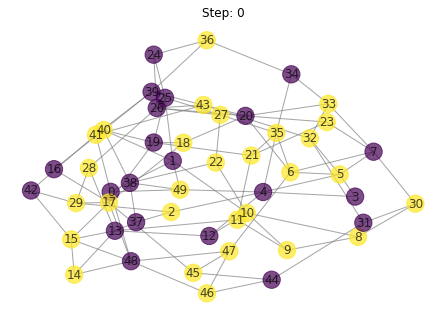

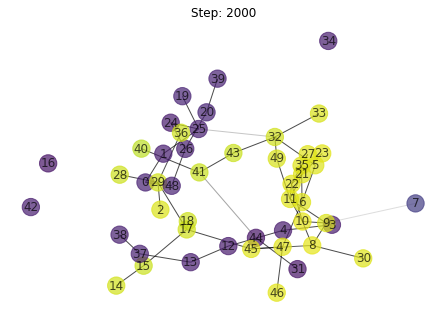

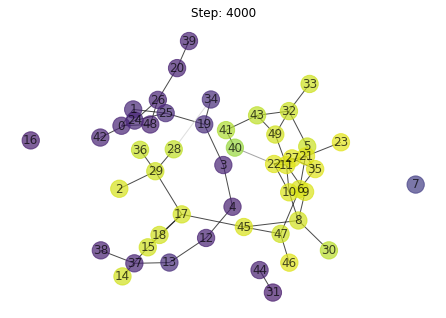

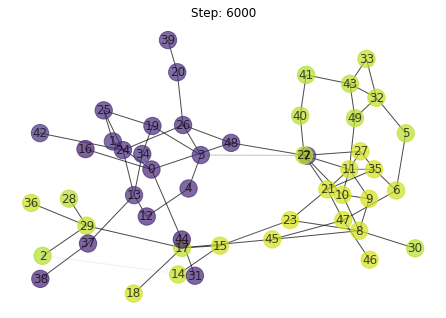

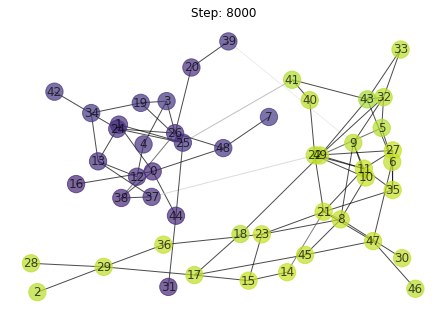

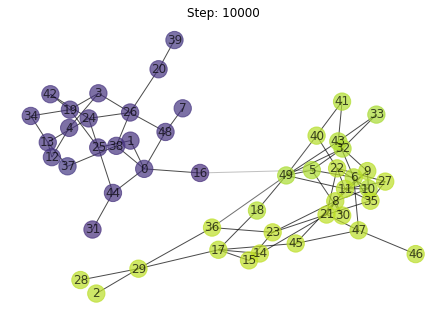

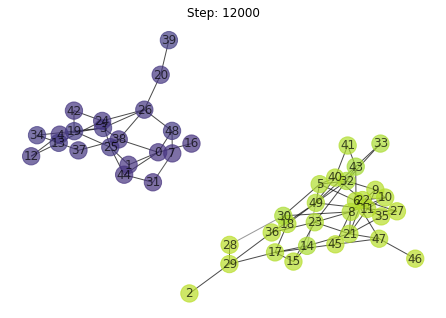

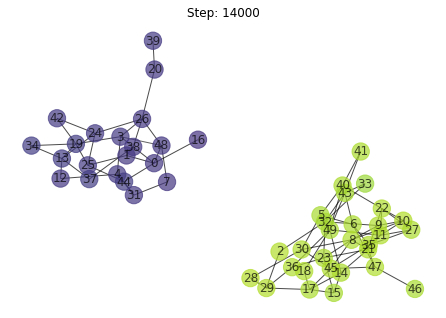

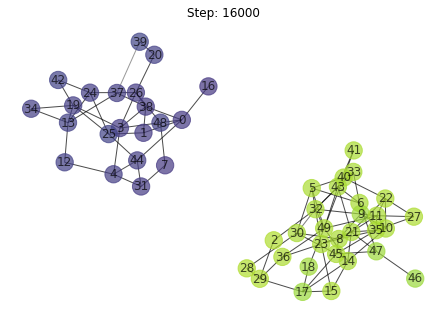

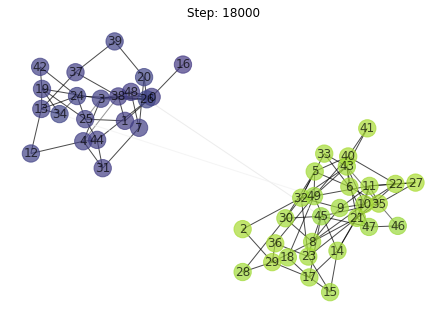

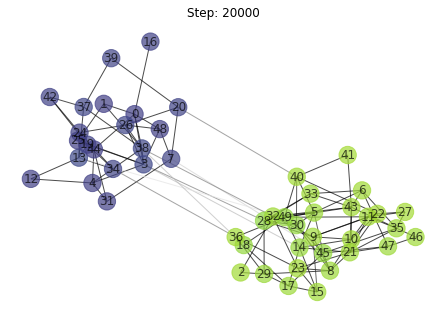

In [114]:
sim = SocialDynamicsSimulation()
sim.initialize()
plt.figure()
sim.observe()
for i in range(10):
    for i in range(2000):
        sim.update()
    plt.figure()
    sim.observe()

In [70]:
#With multiple opinions
class SocialDynamicsSimulation:
    '''
    Simulate social dynamics by strengthening opinions and connection weights
    based on random interactions between nodes.
    '''

    def __init__(self, network_size=50, alpha=0.03, beta=0.3, gamma=4, theta=1):
        '''
        Inputs:

            network_size (int) The number of nodes in the random Watts-Strogatz
              small-world network. Default: 50.

            alpha (float) The rate at which nodes adjust their opinions to
              match neighboring nodes' opinions during interactions.
              Default: 0.03.

            beta (float) The rate at which edge weights are changed in
              response to differing opinions. Default: 0.3.

            gamma (float) The pickiness of nodes. Nodes with opinions differing
              by more than 1/gamma will result in an edge weight decreasing.
              Default: 4.
              
            theta (int) The number of topics on which nodes hold opinions
        '''
        self.network_size = network_size
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.theta = theta

    def initialize(self):
        '''
        Initialize the simulation with a random graph, with random 0 or 1
        opinions assigned to all nodes and initial edge weights of 0.5.
        '''
        self.graph = nx.watts_strogatz_graph(50, 5, 0.5)
        for edge in self.graph.edges:
            self.graph.edges[edge]['weight'] = 0.5
        for node in self.graph.nodes:
            self.graph.nodes[node]['opinion'] = sts.bernoulli(0.5).rvs(self.theta)
        self.layout = nx.spring_layout(self.graph)  # Initial visual layout
        self.step = 0

    def observe(self):
        '''
        Draw the state of the network.
        '''
        self.layout = nx.spring_layout(self.graph, pos = self.layout, iterations=5)
        plt.clf()
        nx.draw(
            self.graph, pos=self.layout, with_labels=True,
            node_color=[np.mean(self.graph.nodes[i]['opinion']) for i in self.graph.nodes], #FIX OBSERVATION FOR 3 Topics
            edge_color=[self.graph.edges[i, j]['weight'] for i, j in self.graph.edges],
            edge_cmap=plt.cm.binary, edge_vmin=0, edge_vmax=1,
            alpha=0.7, vmin=0, vmax=1)
        plt.title('Step: ' + str(self.step))

    def update(self):
        if random.uniform(0, 1) < 0.01:
            # Create a new edge with weight 0.5 between two unconnected nodes
            nodes = list(self.graph.nodes)
            while True:
                new_edge = random.sample(nodes, 2)
                if new_edge not in self.graph.edges:
                    break
            self.graph.add_edge(new_edge[0], new_edge[1], weight=0.5)
        else:
            # Select a random edge and topic and update node opinions and edge weight
            edge = random.choice(list(self.graph.edges))
            weight = self.graph.edges[edge]['weight']
            topic = random.choice(list(range(self.theta)))
            opinions = [self.graph.nodes[n]['opinion'][topic] for n in edge]
            #print("opinions:{}".format(opinions))
            #print("opinions list {}".format([self.graph.nodes[n]['opinion'][topic] for n in edge]))
            for i in [0, 1]:
                self.graph.nodes[edge[i]]['opinion'][topic] = (
                    opinions[i] + self.alpha * weight * (opinions[1-i] - opinions[i]))
            self.graph.edges[edge]['weight'] = (
                weight +
                self.beta * weight * (1-weight) *
                (1 - self.gamma * abs(opinions[0] - opinions[1])))
            # Remove very weak connections
            if self.graph.edges[edge]['weight'] < 0.05:
                self.graph.remove_edge(*edge)
        self.step += 1

In [ ]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

def get_change_vector(o,w,p_i,p_j, alpha=0.03, beta=0.3,gamma=4):
    '''
    Takes the difference in opinion (o) between two nodes, their connection weight (w),
    the persuasiveness of one of the nodes (the one for which the change in opinion is not computed),
    and alpha, beta and gamma values as described in section 1.4.
    returns the change in difference of opinions and in weight of relationship according
    to the update rules from section 1.2
    '''
    
    #difference in difference in opinion 
    o_change = -alpha*o*w*(2+p_i+p_j)
    #difference in connection weight
    w_change = beta*w*(1-w)*(1-gamma*abs(o))
    
    return o_change,w_change

x = np.linspace(0,1,10) #list of different opinion differences
y = np.linspace(0,1,10) #list of different connection weights
X,Y = np.meshgrid(x,y)  #meshgrid for vector field plot
n = 4 #range of p_j
p = np.linspace(0,6,n) #p_j linspace

alpha= 0.03
beta = 0.3
gamma = 4

#colormmaps
colour_map = cm.get_cmap('coolwarm',n)
plt.figure(figsize=(16,10))
plt.title 
for p_i in p:
    plt.subplot(2, 2, (p_i/2)+1)
    colour = 0
    for p_j in p:
        U,V = get_change_vector(X,Y,p_i,p_j,alpha,beta,gamma)
        #plt.quiver(X,Y,U,V,color = colour_map(colour/n),width=0.004, headwidth=1.75)
        plt.streamplot(X,Y,U,V,color = colour_map(colour/n))
        colour+=1
    plt.title("Persuasiveness of i: {}".format(p_i))
    plt.xlabel('Opinion difference')
    plt.ylabel('Connection Weight')
    plt.ylim([-0.05,1.05])
    plt.xlim([-0.05,1.05])
    plt.axhline(0.05, color='black', linewidth=1, linestyle='-.')
    cbar = plt.colorbar(cm.ScalarMappable(cmap=colour_map), boundaries=p)
    cbar.set_label('Persuasiveness of j')
    
plt.show()